In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# New Section

In [ ]:

     !cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle datasets download -d techsash/waste-classification-data

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
!kaggle competitions list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.losses import categorical_crossentropy
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

from PIL import Image

In [ ]:
train_path = '/content/drive/MyDrive/TEST'
test_path = '/content/drive/MyDrive/TRAIN'
IMG_BREDTH = 30
IMG_HEIGHT = 60
num_classes = 2

In [ ]:
train_batch = ImageDataGenerator(featurewise_center=False,
                                 samplewise_center=False,
                                 featurewise_std_normalization=False,
                                 samplewise_std_normalization=False,
                                 zca_whitening=False,
                                 rotation_range=45,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=False).flow_from_directory(train_path,
                                                                          target_size=(IMG_HEIGHT, IMG_BREDTH),
                                                                          classes=['O', 'R'],
                                                                          batch_size=100)

test_batch = ImageDataGenerator().flow_from_directory(test_path,
                                                      target_size=(IMG_HEIGHT, IMG_BREDTH),
                                                      classes=['O', 'R'],
                                                      batch_size=100)


Found 2523 images belonging to 2 classes.
Found 22564 images belonging to 2 classes.


In [ ]:

def cnn_model():

    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT,IMG_BREDTH,3)))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(num_classes, activation='softmax'))

    model.summary()

    return model

# def use_model(path):

#     model = load_model('best_waste_classifier.h5')
#     pic = plt.imread(path)
#     pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
#     pic = np.expand_dims(pic, axis=0)
#     classes = model.predict_classes(pic)
#     model = load_model('best_waste_classifier.h5')
#     pic1 = plt.imread(path)
#     pic = Image.open(path).resize((IMG_BREDTH, IMG_HEIGHT))
#     plt.imshow(pic1)
#     if model.predict_classes(np.expand_dims(pic, axis=0)) == 0:
#          classes = 'ORGANIC'
#     elif model.predict_classes(np.expand_dims(pic, axis=0)) == 1:
#          classes = 'RECYCLABLE'
#     return classes
def use_model(path):
    model = load_model('/content/drive/MyDrive/Colab Notebooks/21-6-23.h5')
    pic = plt.imread(path)
    pic = cv2.resize(pic, (IMG_BREDTH, IMG_HEIGHT))
    pic = np.expand_dims(pic, axis=0)

    predicted_probs = model.predict(pic)
    predicted_class_index = np.argmax(predicted_probs)

    classes = None
    if predicted_class_index == 0:
        classes = 'ORGANIC'
    elif predicted_class_index == 1:
        classes = 'RECYCLABLE'

    pic1 = plt.imread(path)
    pic = Image.open(path).resize((IMG_BREDTH, IMG_HEIGHT))
    plt.imshow(pic1)

    return classes

In [ ]:

model = cnn_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 58, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 28, 13, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 26, 11, 64)        18496     
                                                        

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/21-6-23.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')



In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1.0e-4), metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
model = model.fit_generator(train_batch,
                            validation_data=test_batch,
                            epochs=10,
                            verbose=1,
                            callbacks=[checkpoint])

<ipython-input-32-0d51ce67d470>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model = model.fit_generator(train_batch,


Epoch 1/10
26/26 [==============================] - 6484s 259s/step - loss: 7.3530 - accuracy: 0.4994 - val_loss: 0.6604 - val_accuracy: 0.6208
Epoch 2/10
26/26 [==============================] - 62s 2s/step - loss: 1.5482 - accuracy: 0.5371 - val_loss: 0.5960 - val_accuracy: 0.6859
Epoch 3/10
26/26 [==============================] - 63s 3s/step - loss: 0.9188 - accuracy: 0.5929 - val_loss: 0.5502 - val_accuracy: 0.7266
Epoch 4/10
26/26 [==============================] - 63s 2s/step - loss: 0.7310 - accuracy: 0.6472 - val_loss: 0.5312 - val_accuracy: 0.7357
Epoch 5/10
26/26 [==============================] - 93s 4s/step - loss: 0.6315 - accuracy: 0.7055 - val_loss: 0.5214 - val_accuracy: 0.7467
Epoch 6/10
26/26 [==============================] - 62s 2s/step - loss: 0.5811 - accuracy: 0.7416 - val_loss: 0.5136 - val_accuracy: 0.7500
Epoch 7/10
26/26 [==============================] - 61s 2s/step - loss: 0.5809 - accuracy: 0.7447 - val_loss: 0.5381 - val_accuracy: 0.7410
Epoch 8/10
26/26

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf


1/1 [==============================] - 0s 97ms/step
ORGANIC


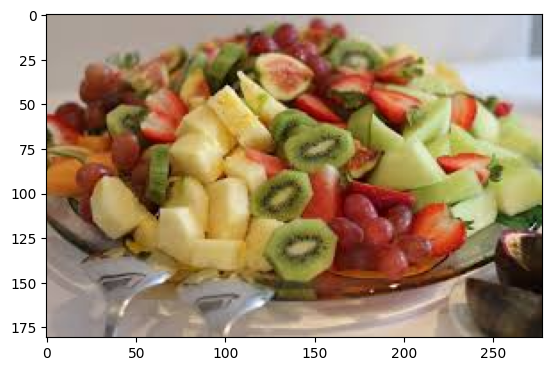

In [ ]:
print(use_model("/content/O_191.jpg"))
